In [1]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


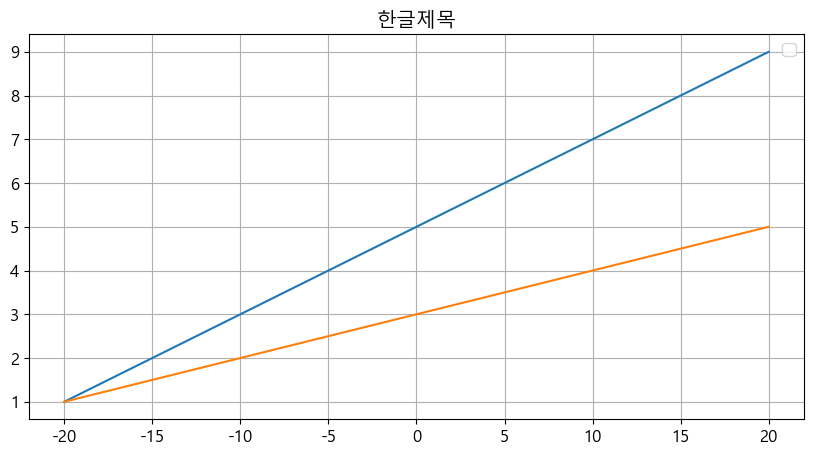

In [3]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(x=[-20,-10,0,10,20], y=[1,3,5,7,9])
sb.lineplot(x=[-20,-10,0,10,20], y=[1,2,3,4,5])

plt.title('한글제목')
plt.legend()
plt.grid()
plt.show()
plt.close()

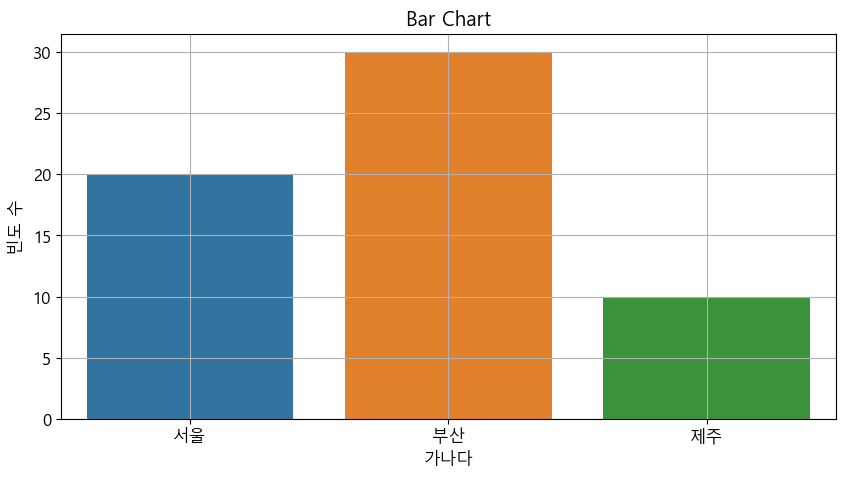

In [4]:
x = ["서울", "부산", "제주"]
y = [20,30,10]

sb.barplot(x=x, y=y)

plt.title("Bar Chart")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.grid()
plt.show()
plt.close()


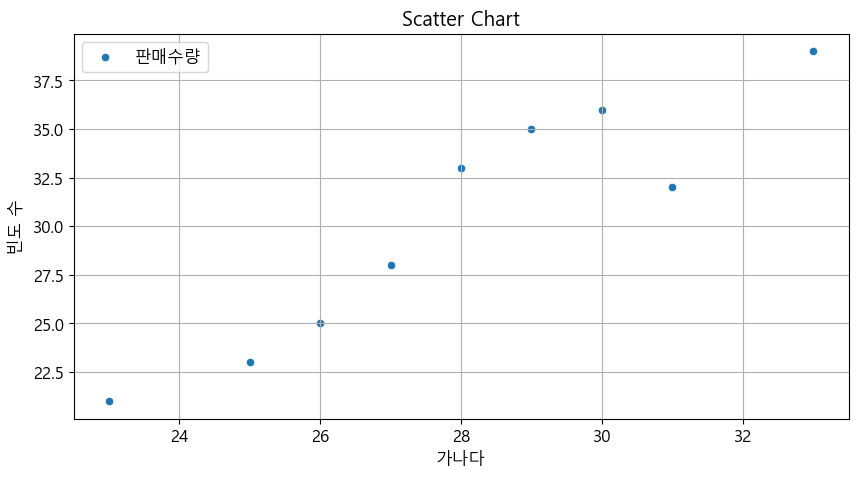

In [5]:
# 온도와 아이스크림 판매 수량
tmp = [23,25,26,27,28,29,30,31,33]
qty = [21,23,25,28,33,35,36,32,39]

sb.scatterplot(x=tmp, y=qty, label='판매수량')

plt.title("Scatter Chart")
plt.grid()
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()
plt.close()

In [12]:
df = read_excel("https://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col="년도")
print(df)
print(df.index)

        발생건수  사망자수    부상자수
년도                        
2005  214171  6376  342233
2006  213745  6327  340229
2007  211662  6166  335906
2008  215822  5870  338962
2009  231990  5838  361875
2010  226878  5505  352458
2011  221711  5229  341391
2012  223656  5392  344565
2013  215354  5092  328711
2014  223552  4762  337497
2015  232035  4621  350400
2016  220917  4292  331720
2017  216335  4185  322829
2018  217148  3781  323037
Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018],
      dtype='int64', name='년도')


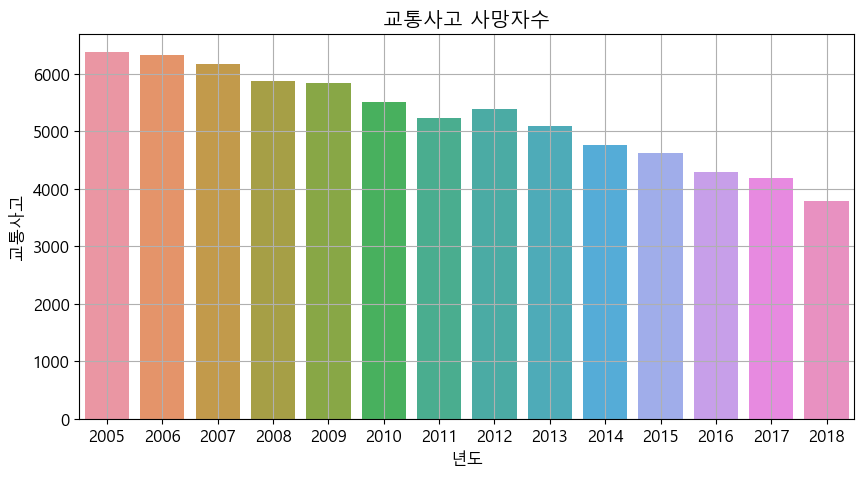

In [7]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.barplot(data=df, x=df.index, y='사망자수')

plt.title('교통사고 사망자수')   # 그래프 제목
plt.xlabel("년도")      # x축 제목
plt.ylabel("교통사고")   # y축 제목
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

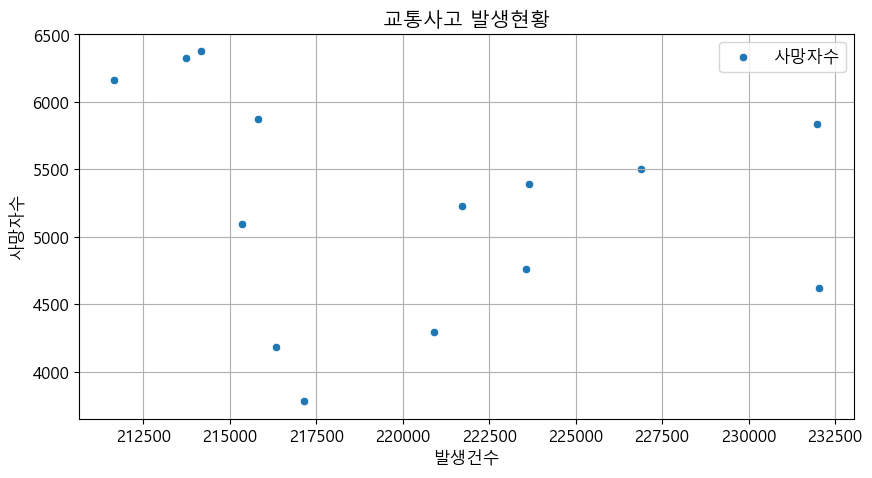

In [8]:
# 그래프 그리기(서브플롯을 사용할 경우 ax파라미터 사용가능)
sb.scatterplot(data=df, x='발생건수', y='사망자수', label='사망자수')

plt.title('교통사고 발생현황')   # 그래프 제목
plt.xlabel("발생건수")      # x축 제목
plt.ylabel("사망자수")   # y축 제목
plt.legend()
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()  

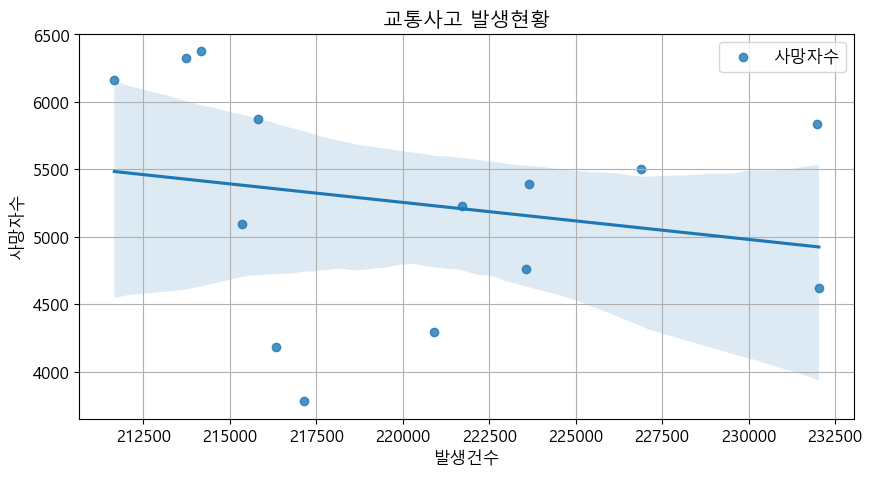

In [10]:
sb.regplot(data=df, x='발생건수', y='사망자수', label='사망자수')

plt.title('교통사고 발생현황')
plt.xlabel("발생건수")
plt.ylabel("사망자수")
plt.legend()
plt.grid()
plt.show()
plt.close()

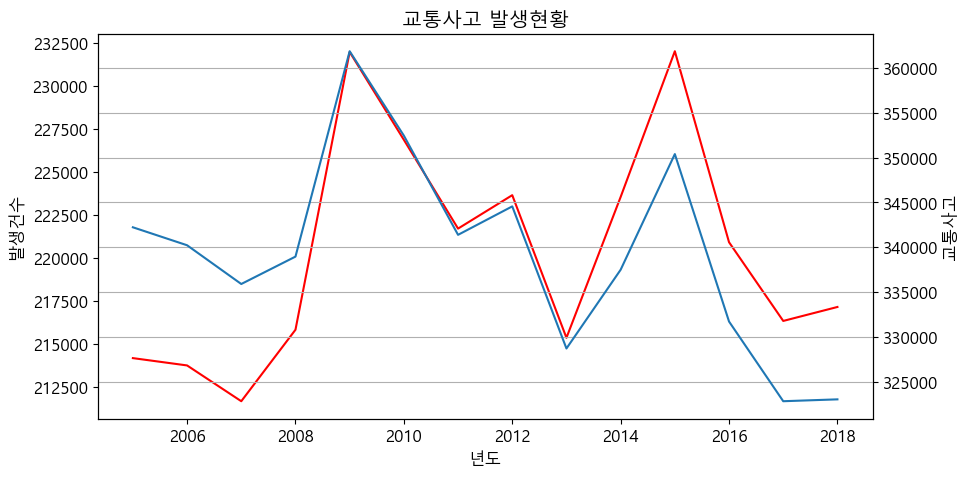

In [17]:
# 서브 플롯에 기반한 선 그래프

fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx() # ax2 = ax1.twinx() ax1과 x축을 공유하는 새로운 Axes 객체

sb.lineplot(data=df, x=df.index, y='발생건수', color='red', ax=ax1)
sb.lineplot(data=df, x=df.index, y='부상자수', ax=ax2)
# ax는 축을 나타내는데 ax 없어도 생성이 가능하나 두개의
# 그래프를 한 축으로 서로 비교하고자 할 때 ax=ax1, ax=ax2로 
# 구분하여 설정 할 수 있다.
plt.title('교통사고 발생현황')
plt.xlabel("년도")
plt.ylabel("교통사고")
plt.grid()
plt.show()
plt.close()

In [18]:
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel
import seaborn as sb
import numpy as np

In [19]:
plt.rcParams["font.family"] = 'Malgun Gothic'  # windows 한글 지원 폰트 설정
# plt.rcParams["font.family"] = 'AppleGothic'  # mac 한글 지원 폰트 설정

plt.rcParams["font.size"] = 12               # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (8, 5)    # 그래프 사이즈 (가로,세로)inch
plt.rcParams["axes.unicode_minus"] = False

In [20]:
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titanic.info()
# PassengerId 승객id
# survived 생존여부
# pclass 객실의 등급
# name, sex, age
# sibsp 동승한 형제 혹은 배우자 수
# parch 동승한 자녀 혹은 부모의 수
# ticket 티켓번호
# fare 요금
# cabin 선실
# Embarked 탑승지(부유/가난을 분류하기 위해)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [22]:
# 데이터 처리
df = titanic.astype({"Survived" : 'category', 'Pclass':'category', 'Sex' : 'category',
                      "Cabin" : "category","Embarked": "category"})

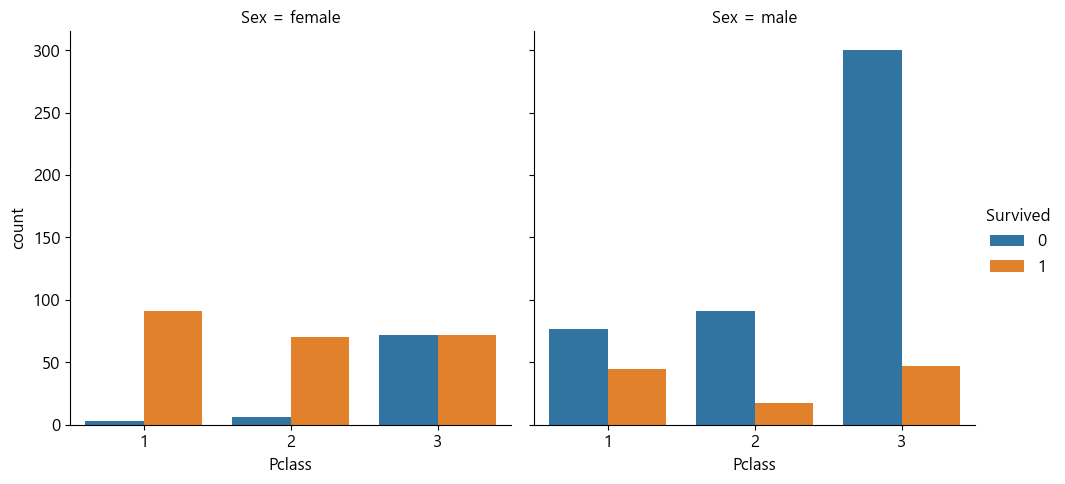

In [24]:
sb.catplot(data=df,
           x='Pclass', # 집단을 구분하는 기준 
           hue='Survived',
            col= 'Sex',
            kind='count' # 그룹핑을 실시할 명목형 그래프 
            )
# plt.xticks([0,1,2], ['1등급','2등급','3등급'])
plt.show()


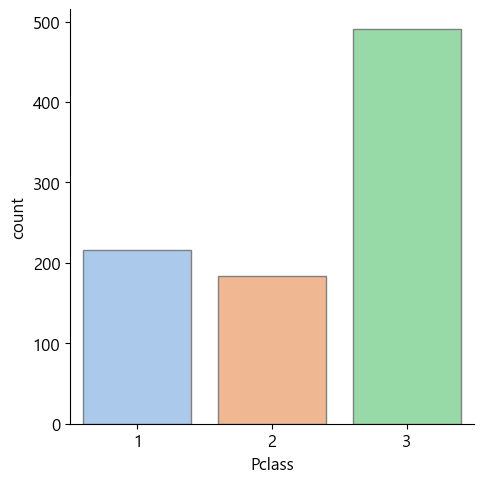

In [26]:
sb.catplot(data=df,
           x='Pclass',
           kind='count',
           palette='pastel', # 색상표 지정
           edgecolor='0.5' # 막대 테두리 색상 투명도 지정
           )
plt.show()

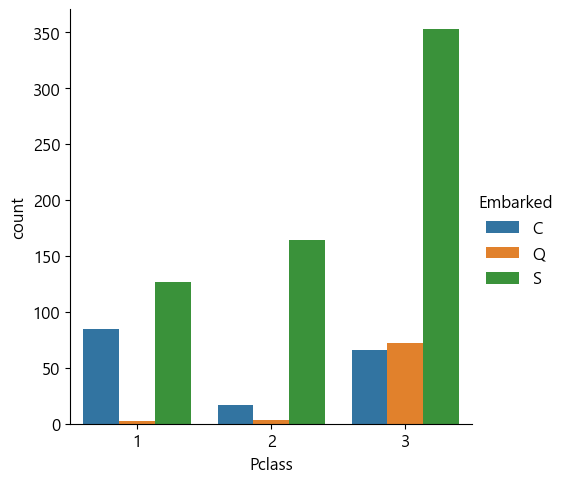

In [28]:
sb.catplot(data=df,
           x='Pclass',
           kind='count',
           hue='Embarked')
plt.show()

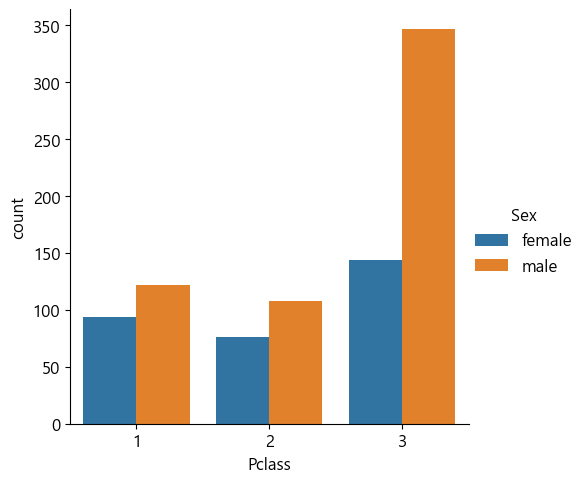

In [30]:
sb.catplot(data=df,
           x="Pclass",
           kind='count',
           hue='Sex')
plt.show()

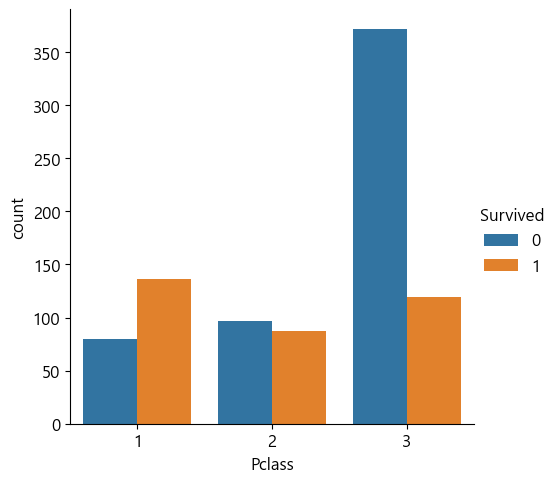

In [31]:
sb.catplot(data=df,
           x="Pclass",
           kind='count',
           hue='Survived')
plt.show()

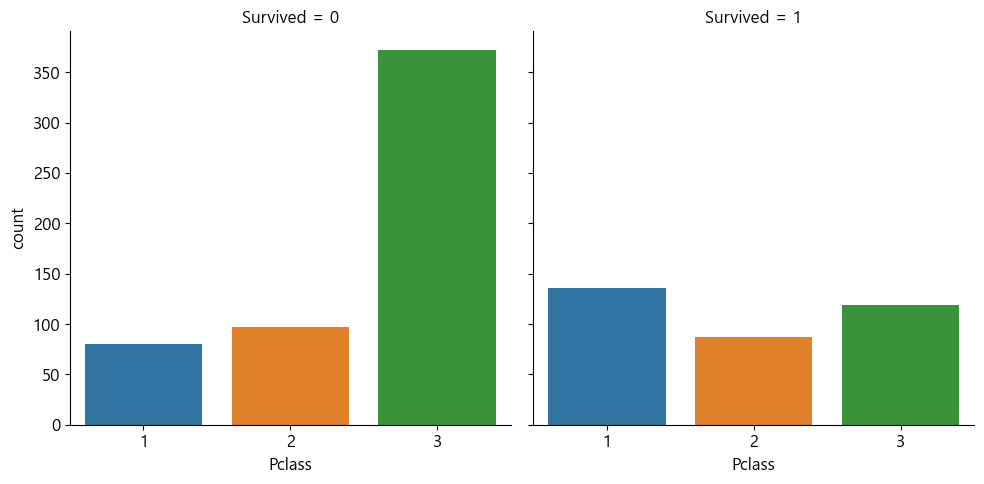

In [33]:
sb.catplot(data=df,
           x="Pclass",
           kind='count',
           col='Survived')
plt.show()

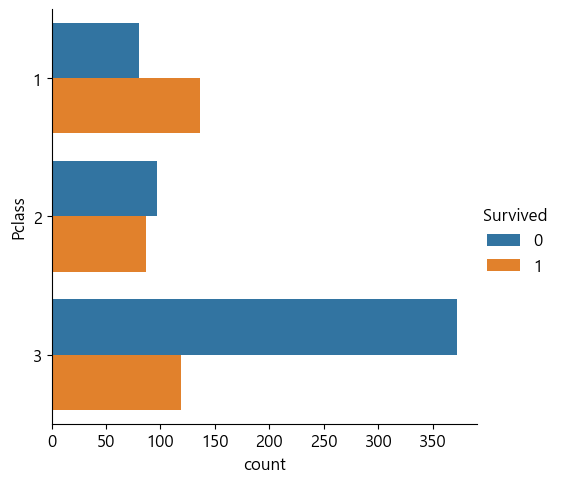

In [36]:
# 가로는 x대신에 y를 이용하면 된다.
sb.catplot(data=df,
           y='Pclass',
           kind='count',
           hue='Survived')
plt.show()

In [37]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

In [38]:
plt.rcParams["font.family"] = 'Malgun Gothic'  # windows 한글 지원 폰트 설정
# plt.rcParams["font.family"] = 'AppleGothic'  # mac 한글 지원 폰트 설정

plt.rcParams["font.size"] = 12               # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (8, 5)    # 그래프 사이즈 (가로,세로)inch
plt.rcParams["axes.unicode_minus"] = False   # 유니코드 뺄셈기호 표시 사용 안함(깨짐방지)

In [41]:
성적표df = read_excel('https://data.hossam.kr/D01/grade.xlsx', index_col='이름')
성적표df

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
혜민,4,여자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,4,남자,91,90,89,80


In [44]:
df = 성적표df.astype({"학년": "category", "성별":"category"})
df.dtypes

학년    category
성별    category
국어       int64
영어       int64
수학       int64
과학       int64
dtype: object

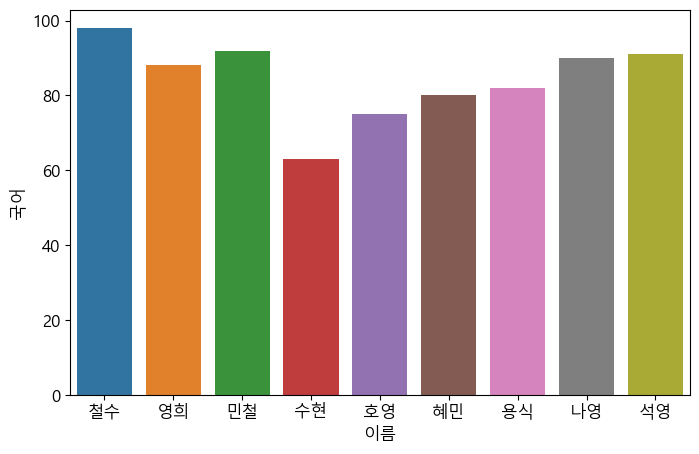

In [45]:
sb.barplot(data=df, x=df.index, y='국어')
plt.show()
plt.close()

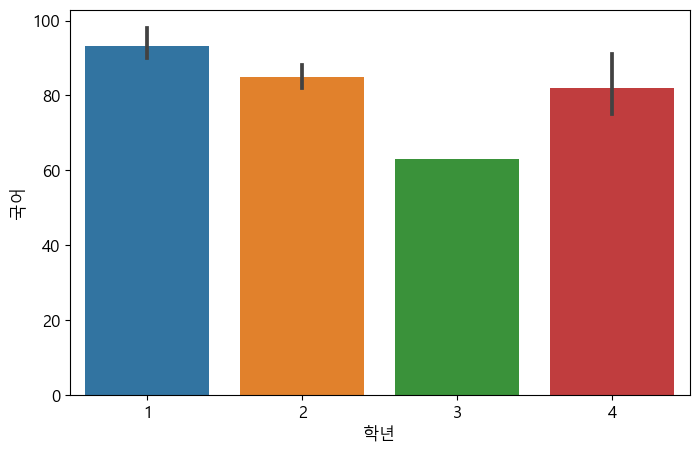

In [46]:
sb.barplot(data=df, x='학년', y='국어')
plt.show()
plt.close()

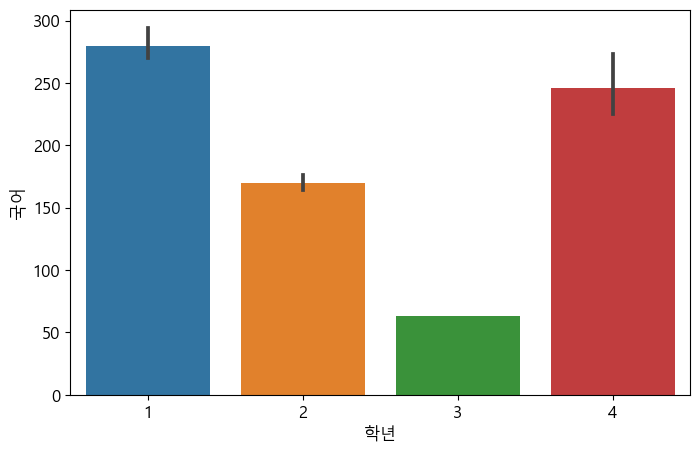

In [47]:
sb.barplot(data=df, x='학년', y='국어', estimator='sum')
plt.show()
plt.close()

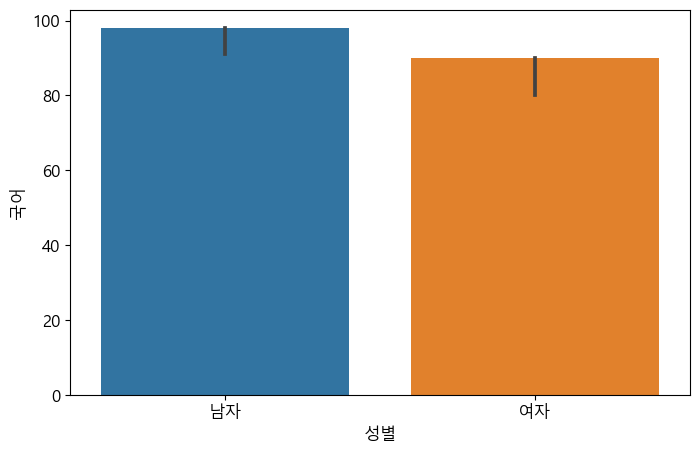

In [48]:
sb.barplot(data=df, x='성별', y='국어', estimator='max')
plt.show()
plt.close()

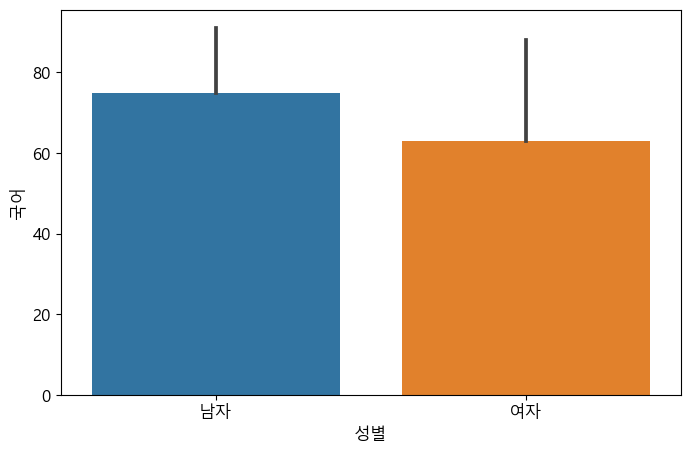

In [49]:
sb.barplot(data=df, x='성별', y='국어', estimator='min')
plt.show()
plt.close()

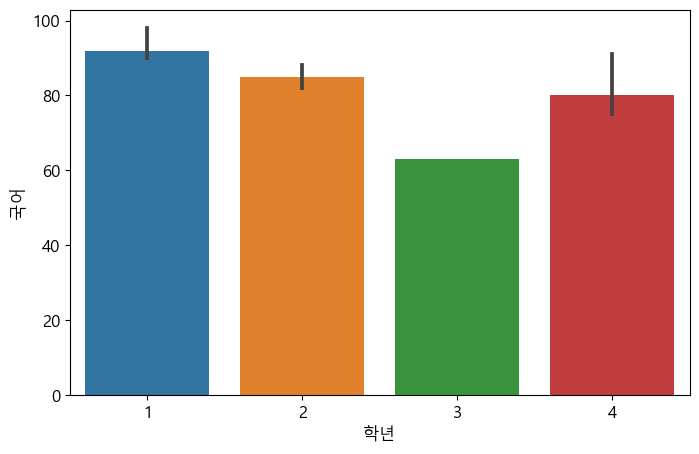

In [50]:
# 중앙값
sb.barplot(data=df, x='학년', y='국어', estimator='median')
plt.show()
plt.close()

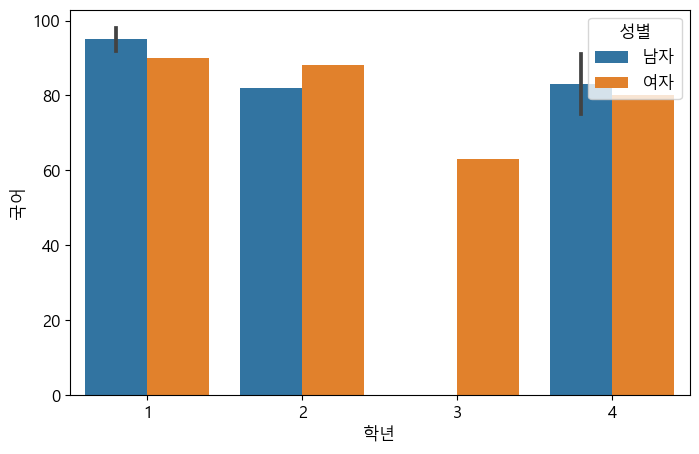

In [51]:
sb.barplot(data=df, x='학년', y='국어', hue='성별', estimator='median')
# hue='성별' 을 두어 성별 개별로 그래프를 그릴 수 있게해준다
plt.show()
plt.close()

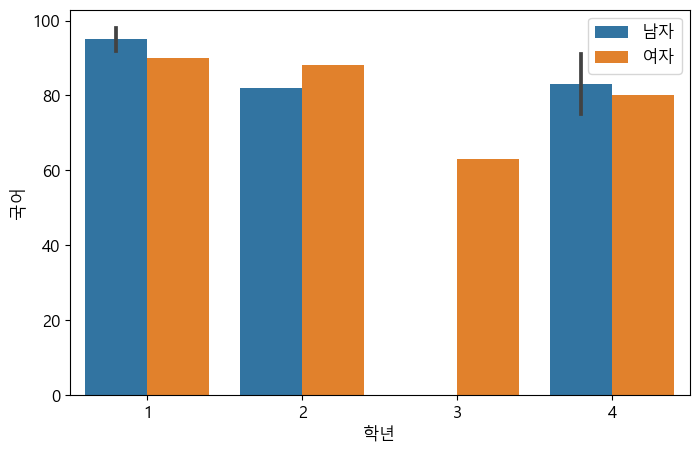

In [52]:
sb.barplot(data=df, x='학년', y='국어', hue='성별', estimator='median')
plt.legend(bbox_to_anchor=(1,1))
plt.show()
plt.close()
# 범주의 위치 옮기기 plt.legend(bbox_to_anchor(1,1))

In [53]:
df1 = df.filter(['국어']).rename(columns={'국어': '점수'})
df1['과목'] = '국어'
df1

,점수,과목
이름,,
철수,98,국어
영희,88,국어
민철,92,국어
수현,63,국어
호영,75,국어
혜민,80,국어
용식,82,국어
나영,90,국어
석영,91,국어


In [54]:
df2 = df.filter(['영어']).rename(columns={'영어': '점수'})
df2['과목'] = '영어'
df2

,점수,과목
이름,,
철수,77,영어
영희,120,영어
민철,70,영어
수현,60,영어
호영,50,영어
혜민,88,영어
용식,88,영어
나영,92,영어
석영,90,영어


In [55]:
from pandas import concat
df3 = concat([df1, df2])
df3

,점수,과목
이름,,
철수,98,국어
영희,88,국어
민철,92,국어
수현,63,국어
호영,75,국어
혜민,80,국어
용식,82,국어
나영,90,국어
석영,91,국어


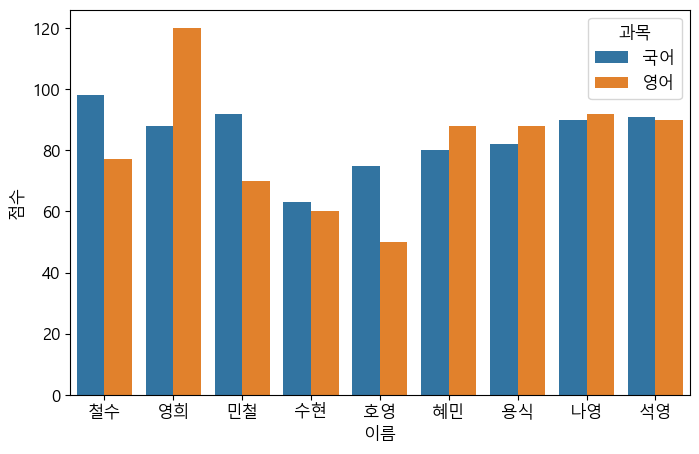

In [56]:
sb.barplot(data=df3, x=df3.index, y='점수', hue='과목')
plt.show()
plt.close()

In [57]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

In [58]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["axes.unicode_minus"] = False

In [59]:
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df = titanic.astype({"Survived": "category", "Pclass": "category", "Sex": "category", 
                     "Cabin": "category", "Embarked": "category"})
df.dtypes

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin       category
Embarked    category
dtype: object

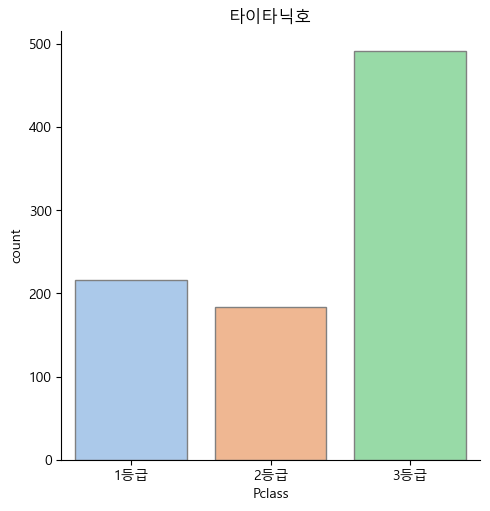

In [61]:
sb.catplot(data=df,
            x='Pclass',       # 집단을 구분하는 기준
            kind="count",     # 그래프 종류
            palette='pastel', # 색상표 지정
            edgecolor='0.5'   # 막대 테두리 색상 투명도 지정(0=불투명 ~ 1=투명, ex: 0.5=반투명)
        )
plt.title("타이타닉호")
plt.xticks([0,1,2], ['1등급','2등급','3등급'])
plt.show()
plt.close()

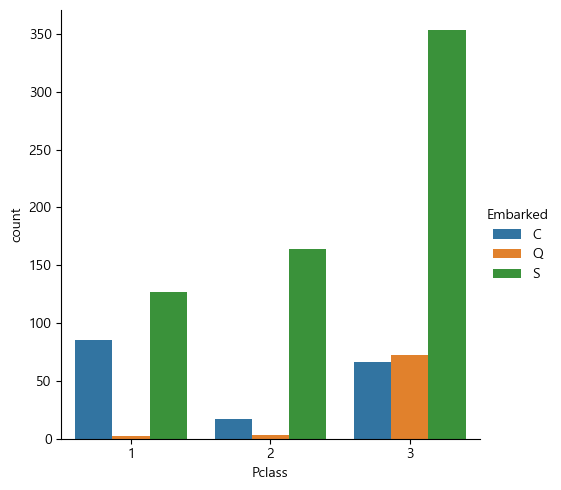

In [62]:
# 객실 등급별 탑승 지역 빈도
sb.catplot(data=df,
            x='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Embarked' 
        )

plt.show()
plt.close()

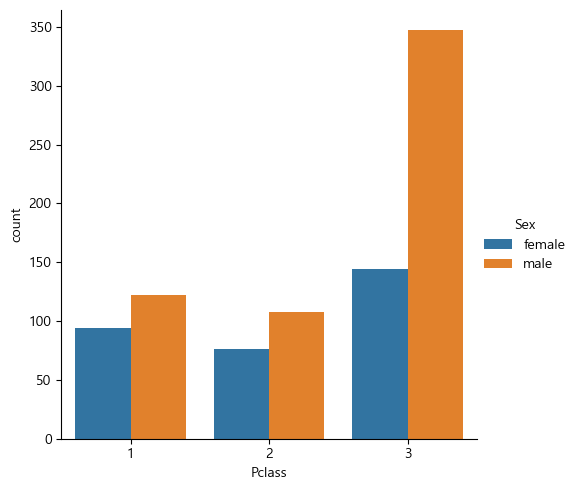

In [63]:
# 객실 등급별 성별 빈도
sb.catplot(data=df,
            x='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Sex' 
        )

plt.show()
plt.close()

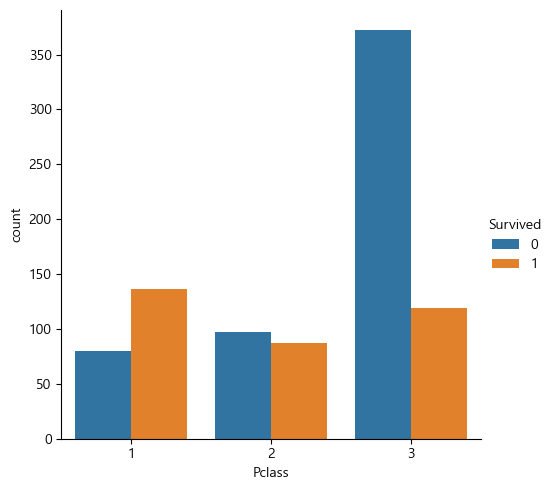

In [64]:
# 객실 등급별 생존여부 빈도
sb.catplot(data=df,
            x='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Survived' 
        )

plt.show()
plt.close()

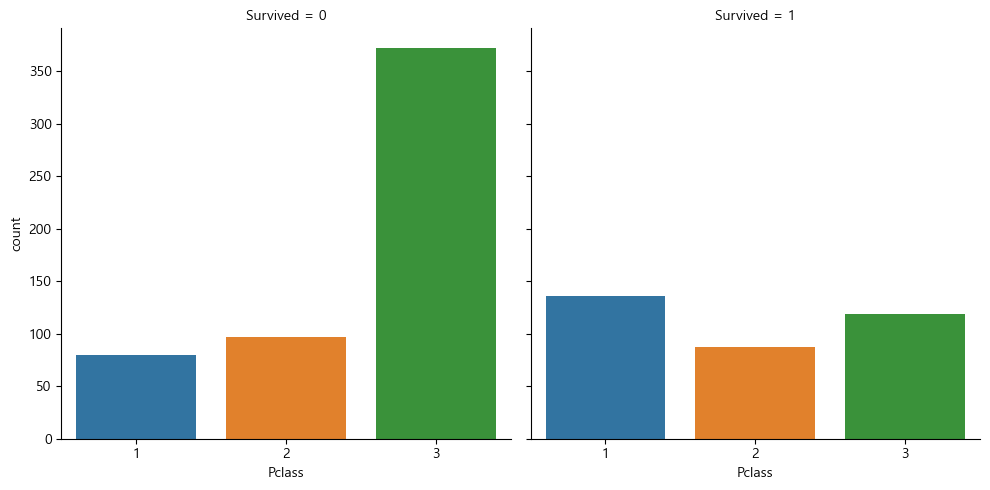

In [65]:
sb.catplot(data=titanic,
            x='Pclass',
            col='Survived',   # 캔버스 분리하기
            kind='count' # 빈도 막대그래프 그리기
        )

plt.show()
plt.close()

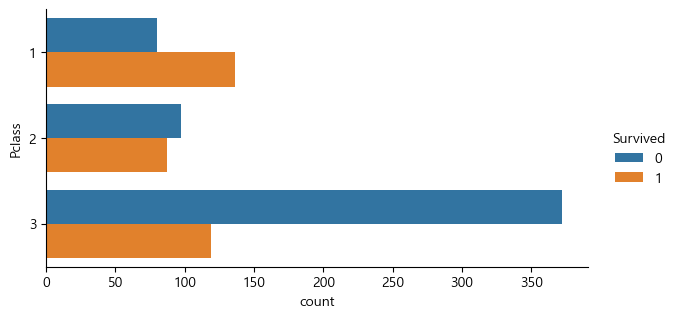

In [66]:
g = sb.catplot(data=df,
            y='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Survived' 
        )

g.fig.set_figwidth(7)
g.fig.set_figheight(3)

plt.show()
plt.close()

In [67]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
from statsmodels.graphics.mosaicplot import mosaic

In [68]:
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")

df = titanic.astype({"Survived": "category", "Pclass": "category", "Sex": "category", 
                     "Cabin": "category", "Embarked": "category"})

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

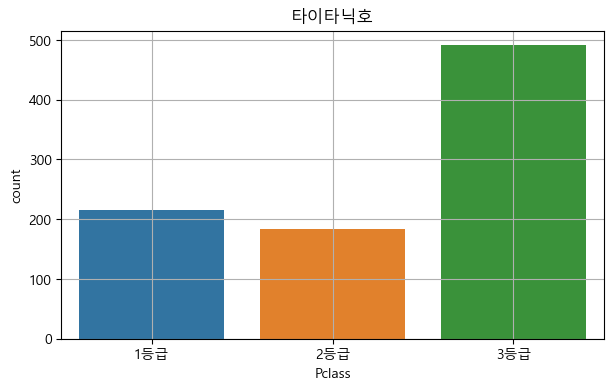

In [70]:
sb.countplot(data=df, x='Pclass')
plt.title("타이타닉호")
plt.xticks([0,1,2], ["1등급","2등급","3등급"])
plt.grid()
plt.show()
plt.close()

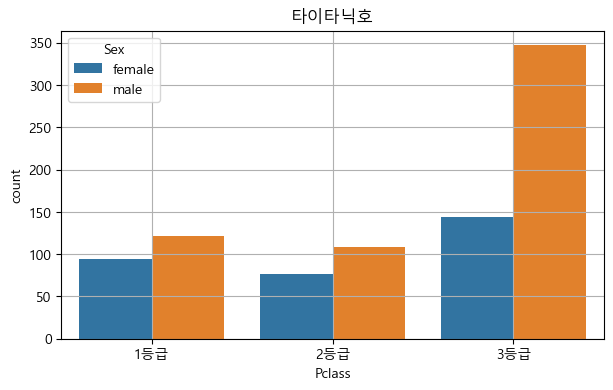

In [72]:
sb.countplot(data=df, x="Pclass", hue="Sex")
plt.title("타이타닉호")
plt.xticks([0,1,2], ["1등급","2등급","3등급"])
plt.grid()
plt.show()
plt.close()

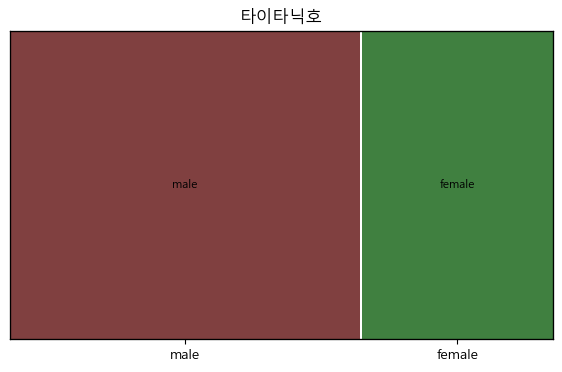

In [75]:
mosaic(df, ['Sex'])
plt.title('타이타닉호')
plt.show()

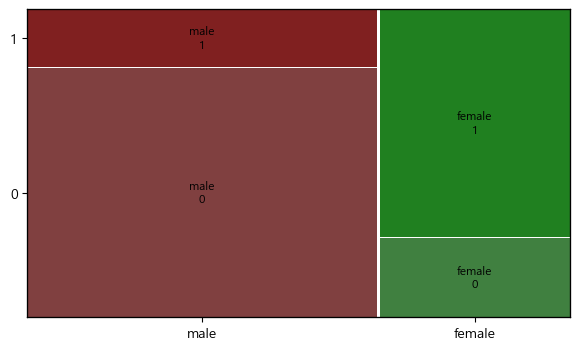

In [77]:
mosaic(df, ['Sex', 'Survived'])
plt.show()

In [78]:
def getColor(key):
    if '1' in key:
        color = 'red'
    else:
        color = 'blue'

    return {'color': color}

In [79]:
def getLabel(key):
    if "male" in key:
        sex = "남자"
    else:
        sex = "여자"
    
    if "0" in key:
        sur = "사망"
    else:
        sur = "생존"
    
    label = "%s/%s" % (sex, sur)
    # print(key, "->", label)
    return label

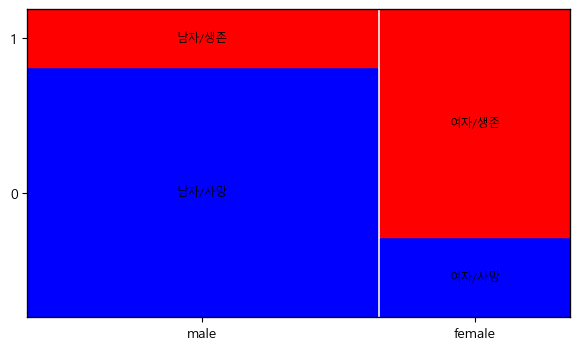

In [80]:
mosaic(df, ['Sex', 'Survived'], properties=getColor, labelizer=getLabel)
plt.show()
plt.close()

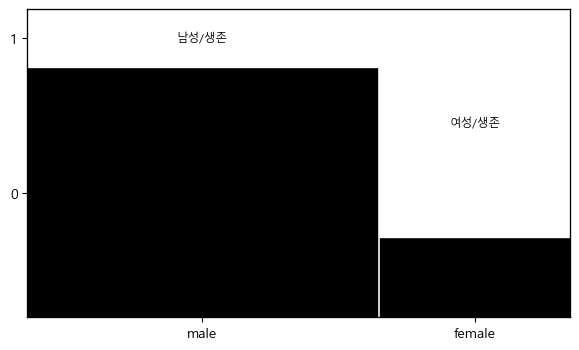

In [83]:
mosaic(df, ['Sex', 'Survived'], 
       properties=lambda key : {'color' : 'white' if '1' in key else 'black'},
       labelizer=lambda key : {('female', '1'): '여성/생존', ('female','0'): '여성/사망',
                               ('male','1'): '남성/생존', ('male', "0"): '남성/사망'}[key])

plt.show()

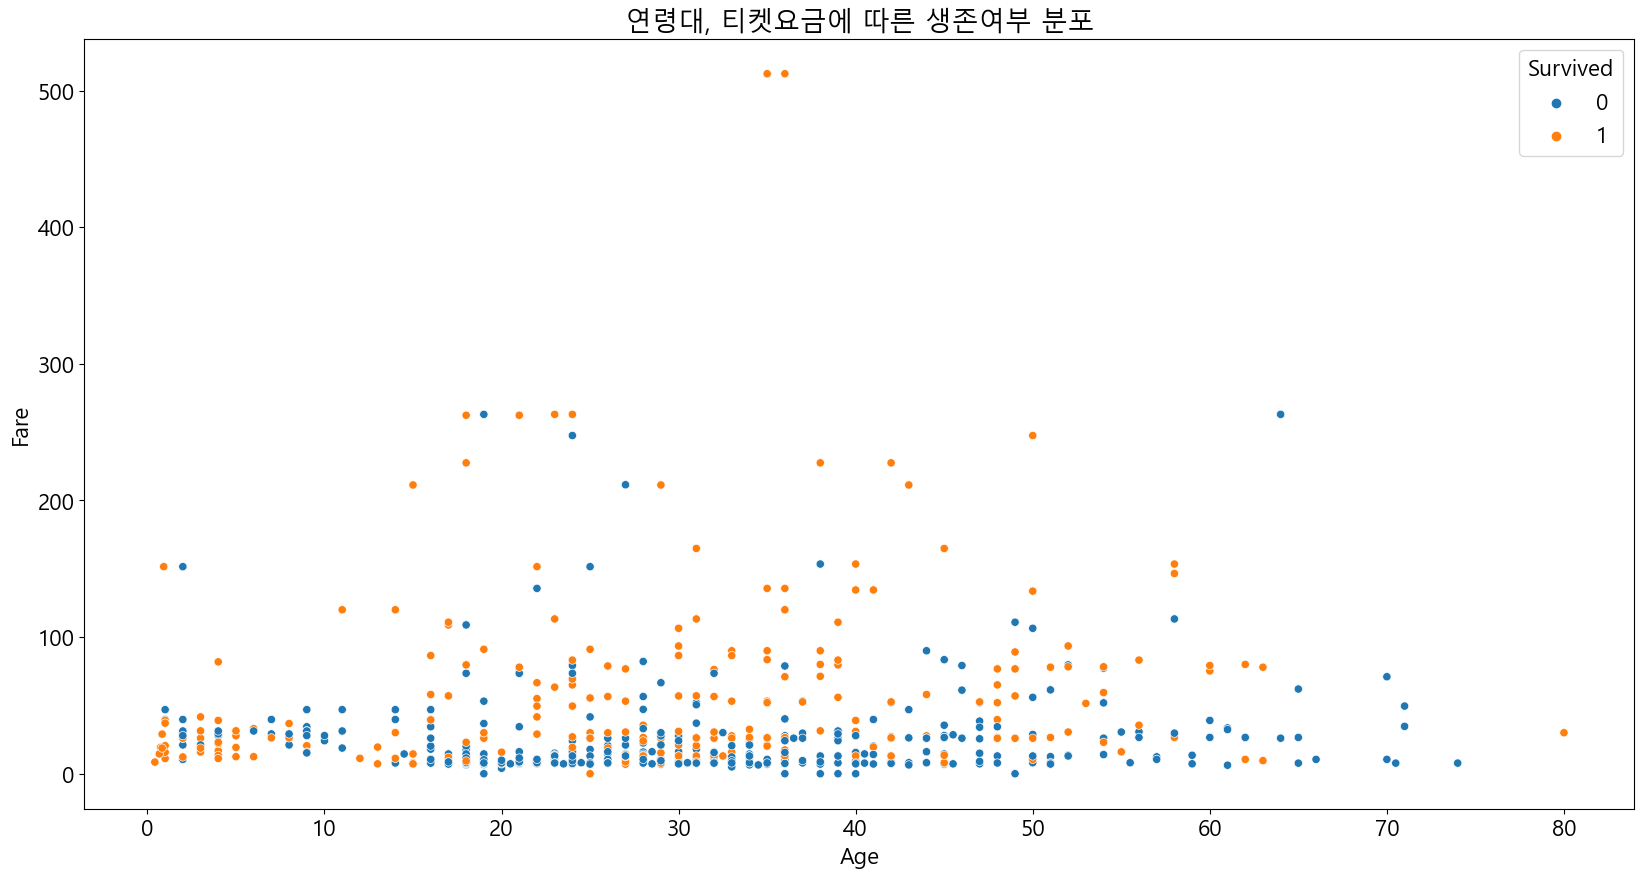

In [86]:
plt.rcParams["font.size"] = 16               # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (20, 10)    # 그래프 사이즈 (가로,세로)inch

sb.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title("연령대, 티켓요금에 따른 생존여부 분포")
plt.show()

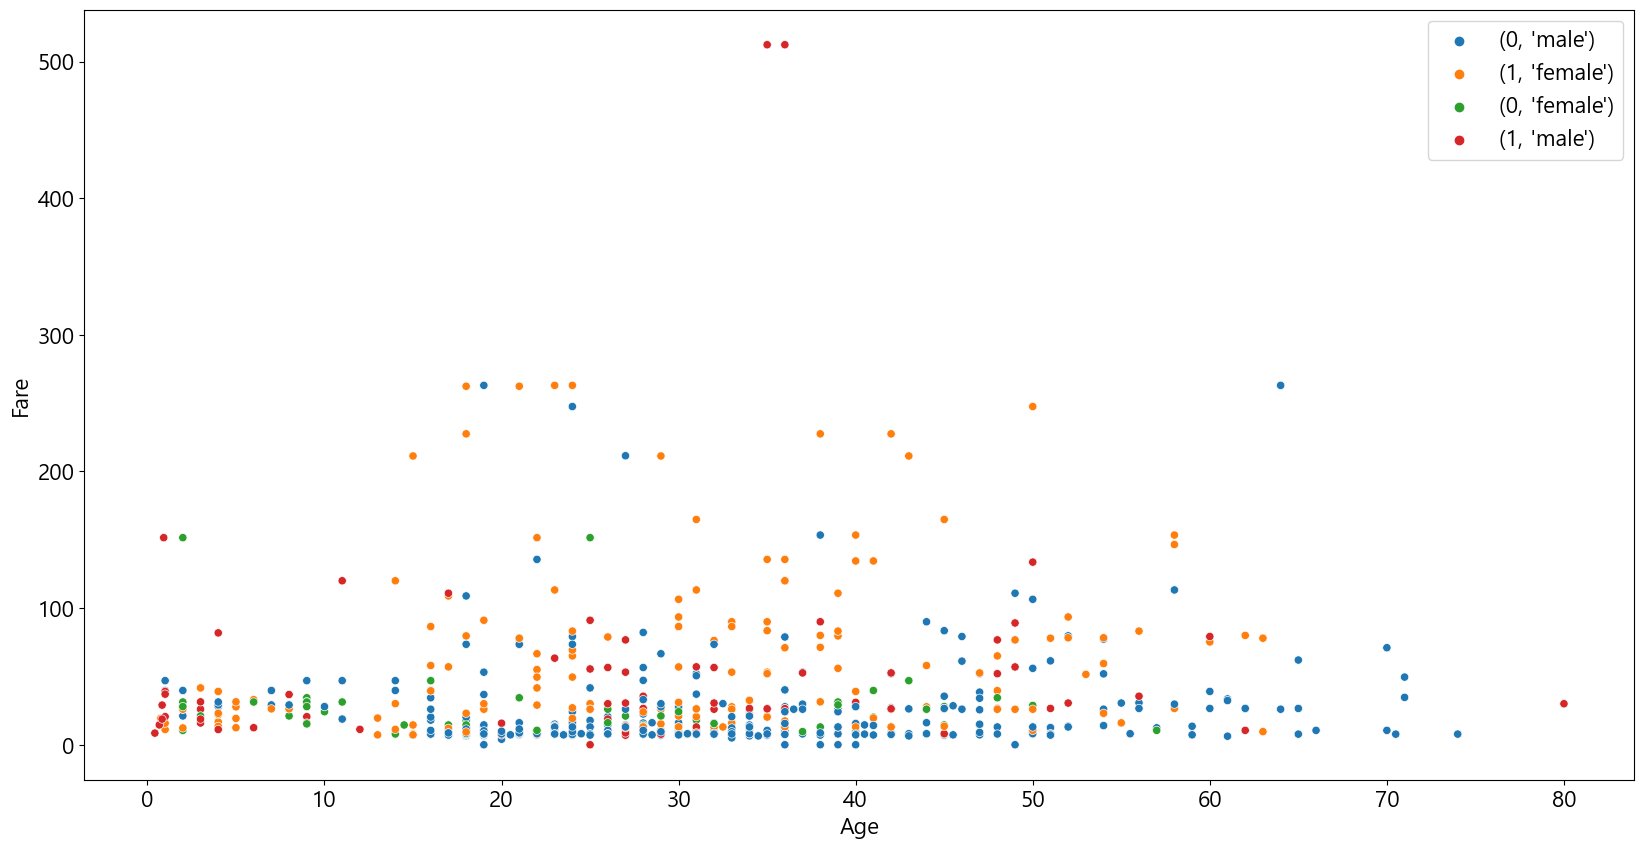

In [87]:
sb.scatterplot(data=df, x='Age', y='Fare', hue=df[['Survived', 'Sex']].apply(tuple, axis=1))
plt.show()

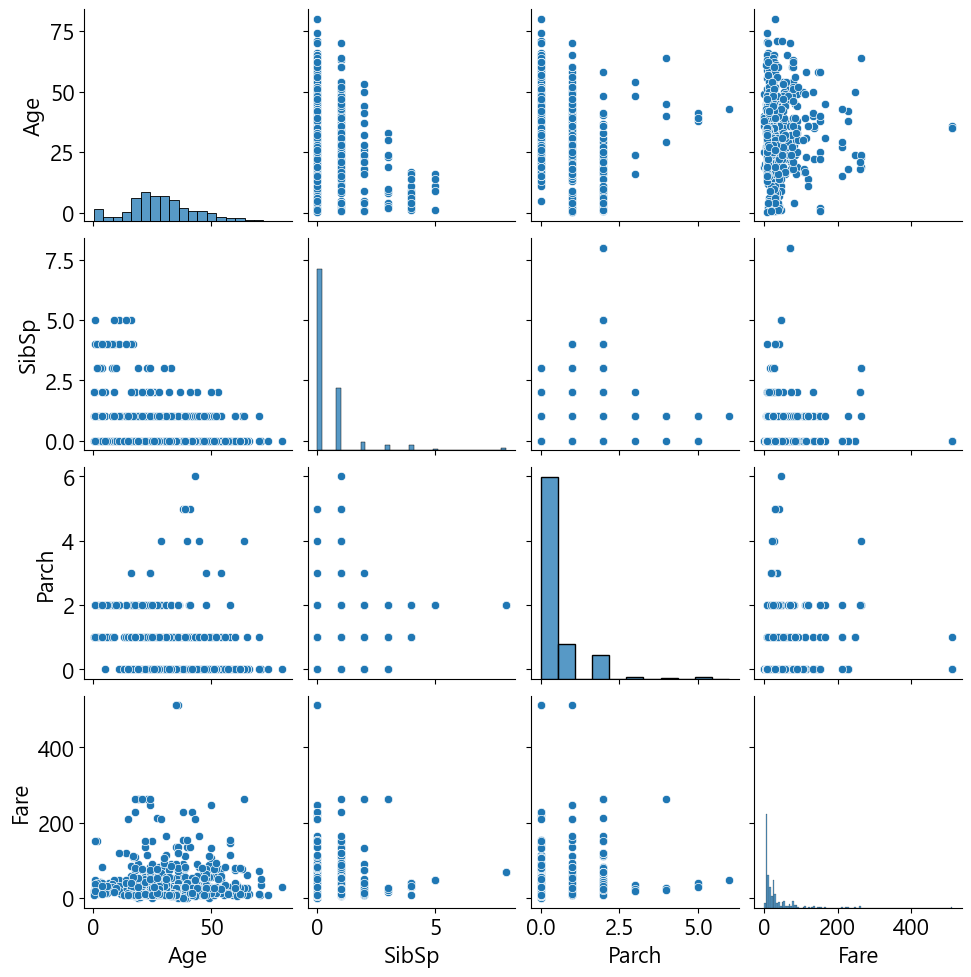

In [88]:
sb.pairplot(df)
plt.show()
plt.close()